# Simran Kaur

# DDA Lab

# 311443

# Exercise 8

# Exercise 1: Apache Spark Basics

In [340]:
import pyspark
from pyspark.sql import *
from pyspark.sql.functions import *
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval
from pyspark.sql.functions import *
from pyspark.sql.types import StringType
from pyspark.sql.types import *

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("SparkByExamples.com").getOrCreate()

In [3]:
spark

## Part a) Basic Operations on Resilient Distributed Dataset (RDD)

In [32]:
from pyspark import SparkContext

In [74]:
a = ["spark", "rdd", "python", "context", "create", "class"]
b = ["operation", "apache", "scala", "lambda","parallel","partition"]

### 1. Perform rightOuterJoin and fullOuterJoin operations between a and b. Briefly explain your solution.

In [82]:
a_ = []
for i, ele in enumerate(a):
    a_.append((ele, i))
a_

[('spark', 0),
 ('rdd', 1),
 ('python', 2),
 ('context', 3),
 ('create', 4),
 ('class', 5)]

In [83]:
b_ = []
for i, ele in enumerate(b):
    b_.append((ele, i)) 
b_

[('operation', 0),
 ('apache', 1),
 ('scala', 2),
 ('lambda', 3),
 ('parallel', 4),
 ('partition', 5)]

In [86]:
a_new = sc.parallelize(a_)
b_new = sc.parallelize(b_)
rightOuterJoin = a_new.rightOuterJoin(b_new).collect()

In [87]:
rightOuterJoin

[('lambda', (None, 3)),
 ('scala', (None, 2)),
 ('operation', (None, 0)),
 ('partition', (None, 5)),
 ('parallel', (None, 4)),
 ('apache', (None, 1))]

In [88]:
fullOuterJoin = a_new.fullOuterJoin(b_new).collect()
fullOuterJoin

[('python', (2, None)),
 ('create', (4, None)),
 ('lambda', (None, 3)),
 ('scala', (None, 2)),
 ('operation', (None, 0)),
 ('partition', (None, 5)),
 ('spark', (0, None)),
 ('context', (3, None)),
 ('parallel', (None, 4)),
 ('class', (5, None)),
 ('rdd', (1, None)),
 ('apache', (None, 1))]

### 2. Using map and reduce functions to count how many times the character "s" appears in all a and b.

In [96]:
a_rdd = sc.parallelize(a)
b_rdd = sc.parallelize(b)

In [90]:
def count_s(x):
    count = 0
    for ch in x:
        if ch == 's':
            count += 1
    return count

In [92]:
a_map = a_rdd.map(count_s)
a_red = a_map.reduce(lambda a, b : a+b)
b_map = b_rdd.map(count_s)
b_red = b_map.reduce(lambda a, b : a+b)

In [93]:
print(f'Number of times "s" appears in all a and b : {a_red + b_red}')

Number of times "s" appears in all a and b : 4


### 3. Using aggregate function to count how many times the character "s" appears in all a and b.

In [110]:
agg = a_rdd.union(b_rdd).flatMap(lambda x: x).filter(lambda x: x == 's'). \
        aggregate(0, (lambda i, value: i + 1) ,(lambda a, b: (a + b)))

In [111]:
agg

4

## Part b) Basic Operations on DataFrames

### Use dataset students.json (download from learnweb) for this exercise. First creating DataFrames from the dataset and do several tasks as follows:

In [331]:
students = sc.textFile('students.json').collect()

In [332]:
studentDf = spark.read.json(sc.parallelize(students))
studentDf.show()

+------------------+------------------+----------+---------+------+----+
|            course|               dob|first_name|last_name|points|s_id|
+------------------+------------------+----------+---------+------+----+
|Humanities and Art|  October 14, 1983|      Alan|      Joe|    10|   1|
|  Computer Science|September 26, 1980|    Martin|  Genberg|    17|   2|
|    Graphic Design|     June 12, 1982|     Athur|   Watson|    16|   3|
|    Graphic Design|     April 5, 1987|  Anabelle|  Sanberg|    12|   4|
|        Psychology|  November 1, 1978|      Kira| Schommer|    11|   5|
|          Business|  17 February 1981| Christian|   Kiriam|    10|   6|
|  Machine Learning|    1 January 1984|   Barbara|  Ballard|    14|   7|
|     Deep Learning|  January 13, 1978|      John|     null|    10|   8|
|  Machine Learning|  26 December 1989|    Marcus|   Carson|    15|   9|
|           Physics|  30 December 1987|     Marta|   Brooks|    11|  10|
|    Data Analytics|     June 12, 1975|     Holly| 

### 1. Replace the null value(s) in column points by the mean of all points.

In [334]:
points_mean = studentDf.agg({'points': 'mean'}).collect()
studentDf = studentDf.na.fill(points_mean[0][0], ['points'])
studentDf.show()

+------------------+------------------+----------+---------+------+----+
|            course|               dob|first_name|last_name|points|s_id|
+------------------+------------------+----------+---------+------+----+
|Humanities and Art|  October 14, 1983|      Alan|      Joe|    10|   1|
|  Computer Science|September 26, 1980|    Martin|  Genberg|    17|   2|
|    Graphic Design|     June 12, 1982|     Athur|   Watson|    16|   3|
|    Graphic Design|     April 5, 1987|  Anabelle|  Sanberg|    12|   4|
|        Psychology|  November 1, 1978|      Kira| Schommer|    11|   5|
|          Business|  17 February 1981| Christian|   Kiriam|    10|   6|
|  Machine Learning|    1 January 1984|   Barbara|  Ballard|    14|   7|
|     Deep Learning|  January 13, 1978|      John|     null|    10|   8|
|  Machine Learning|  26 December 1989|    Marcus|   Carson|    15|   9|
|           Physics|  30 December 1987|     Marta|   Brooks|    11|  10|
|    Data Analytics|     June 12, 1975|     Holly| 

### 2. Replace the null value(s) in column dob and column last name by "unknown" and "--" respectively.

In [335]:
studentDf = studentDf.na.fill("unknown",["dob"]).na.fill("--",["last_name"])
studentDf.show()

+------------------+------------------+----------+---------+------+----+
|            course|               dob|first_name|last_name|points|s_id|
+------------------+------------------+----------+---------+------+----+
|Humanities and Art|  October 14, 1983|      Alan|      Joe|    10|   1|
|  Computer Science|September 26, 1980|    Martin|  Genberg|    17|   2|
|    Graphic Design|     June 12, 1982|     Athur|   Watson|    16|   3|
|    Graphic Design|     April 5, 1987|  Anabelle|  Sanberg|    12|   4|
|        Psychology|  November 1, 1978|      Kira| Schommer|    11|   5|
|          Business|  17 February 1981| Christian|   Kiriam|    10|   6|
|  Machine Learning|    1 January 1984|   Barbara|  Ballard|    14|   7|
|     Deep Learning|  January 13, 1978|      John|       --|    10|   8|
|  Machine Learning|  26 December 1989|    Marcus|   Carson|    15|   9|
|           Physics|  30 December 1987|     Marta|   Brooks|    11|  10|
|    Data Analytics|     June 12, 1975|     Holly| 

### 3. In the dob column, there exist several formats of dates, e.g. October 14, 1983 and 26 December 1989. Let's convert all the dates into DD-MM-YYYY format where DD, MM and YYYY are two digits for day, two digits for months and four digits for year respectively.

In [336]:
import dateutil
def formatdate(dateStr):
    try:
        date = dateutil.parser.parse(dateStr)
        formatedDateStr = date.strftime("%d-%m-%Y")
        return formatedDateStr
    except:
        return str("unknown")
udfformatdate = udf(formatdate, StringType())
studentDf = studentDf.withColumn("dob", udfformatdate("dob"))
studentDf.show()

+------------------+----------+----------+---------+------+----+
|            course|       dob|first_name|last_name|points|s_id|
+------------------+----------+----------+---------+------+----+
|Humanities and Art|14-10-1983|      Alan|      Joe|    10|   1|
|  Computer Science|26-09-1980|    Martin|  Genberg|    17|   2|
|    Graphic Design|12-06-1982|     Athur|   Watson|    16|   3|
|    Graphic Design|05-04-1987|  Anabelle|  Sanberg|    12|   4|
|        Psychology|01-11-1978|      Kira| Schommer|    11|   5|
|          Business|17-02-1981| Christian|   Kiriam|    10|   6|
|  Machine Learning|01-01-1984|   Barbara|  Ballard|    14|   7|
|     Deep Learning|13-01-1978|      John|       --|    10|   8|
|  Machine Learning|26-12-1989|    Marcus|   Carson|    15|   9|
|           Physics|30-12-1987|     Marta|   Brooks|    11|  10|
|    Data Analytics|12-06-1975|     Holly| Schwartz|    12|  11|
|  Computer Science|02-07-1985|     April|    Black|    11|  12|
|  Computer Science|22-07

### 4. Insert a new column age and calculate the current age of all students.

In [337]:
from datetime import date
def Age(birth):
    if(birth!='unknown'):
        birthDate = dateutil.parser.parse(birth)
        current = date.today()
        return current.year - birthDate.year - ((current.month, current.day) < (birthDate.month, birthDate.day))
    else:
        return 0

In [338]:
udfAge = udf(Age, StringType())
studentDf = studentDf.withColumn("age", udfAge("dob"))
studentDf.show()

+------------------+----------+----------+---------+------+----+---+
|            course|       dob|first_name|last_name|points|s_id|age|
+------------------+----------+----------+---------+------+----+---+
|Humanities and Art|14-10-1983|      Alan|      Joe|    10|   1| 38|
|  Computer Science|26-09-1980|    Martin|  Genberg|    17|   2| 41|
|    Graphic Design|12-06-1982|     Athur|   Watson|    16|   3| 39|
|    Graphic Design|05-04-1987|  Anabelle|  Sanberg|    12|   4| 35|
|        Psychology|01-11-1978|      Kira| Schommer|    11|   5| 44|
|          Business|17-02-1981| Christian|   Kiriam|    10|   6| 41|
|  Machine Learning|01-01-1984|   Barbara|  Ballard|    14|   7| 38|
|     Deep Learning|13-01-1978|      John|       --|    10|   8| 44|
|  Machine Learning|26-12-1989|    Marcus|   Carson|    15|   9| 32|
|           Physics|30-12-1987|     Marta|   Brooks|    11|  10| 34|
|    Data Analytics|12-06-1975|     Holly| Schwartz|    12|  11| 46|
|  Computer Science|02-07-1985|   

### 5. Let's consider granting some points for good performed students in the class. For each student, if his point is larger than 1 standard deviation of all points, then we update his current point to 20, which is the maximum.

In [339]:
mean_points = studentDf.agg({'points': 'mean'}).collect()
std_points = studentDf.agg({'points': 'std'}).collect()

In [341]:
def grant(x):
    if x > (mean_points[0][0] + std_points[0][0]):
        return 20
    else:
        return x

In [342]:
udfgrant = udf(grant, IntegerType())
studentDf = studentDf.withColumn('points', udfgrant('points'))

In [343]:
studentDf.show()

+------------------+----------+----------+---------+------+----+---+
|            course|       dob|first_name|last_name|points|s_id|age|
+------------------+----------+----------+---------+------+----+---+
|Humanities and Art|14-10-1983|      Alan|      Joe|    10|   1| 38|
|  Computer Science|26-09-1980|    Martin|  Genberg|    20|   2| 41|
|    Graphic Design|12-06-1982|     Athur|   Watson|    20|   3| 39|
|    Graphic Design|05-04-1987|  Anabelle|  Sanberg|    12|   4| 35|
|        Psychology|01-11-1978|      Kira| Schommer|    11|   5| 44|
|          Business|17-02-1981| Christian|   Kiriam|    10|   6| 41|
|  Machine Learning|01-01-1984|   Barbara|  Ballard|    14|   7| 38|
|     Deep Learning|13-01-1978|      John|       --|    10|   8| 44|
|  Machine Learning|26-12-1989|    Marcus|   Carson|    20|   9| 32|
|           Physics|30-12-1987|     Marta|   Brooks|    11|  10| 34|
|    Data Analytics|12-06-1975|     Holly| Schwartz|    12|  11| 46|
|  Computer Science|02-07-1985|   

### 6. Create a histogram on the new points created in the task 5.

In [360]:
new_points = sorted([data[0] for data in studentDf.select('points').collect()])
new_points


[6, 7, 9, 9, 10, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 14, 20, 20, 20, 20]

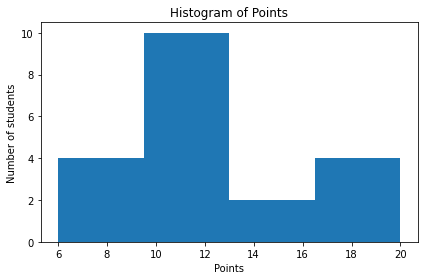

In [363]:
fig, ax = plt.subplots()
num_bins = 4

ax.hist(new_points, num_bins)
ax.set_xlabel('Points')
ax.set_ylabel('Number of students')
ax.set_title(r'Histogram of Points')

fig.tight_layout()
plt.show()

# Exercise 2: Manipulating Recommender Dataset with Apache Spark

### Loading the spark dataframe

In [211]:
tags = sc.textFile('tags.dat').map(lambda line: line.split("::")).collect()
tag_rdd = sc.parallelize(tags).toDF()

In [212]:
tag_rdd.show()

+---+-----+--------------------+----------+
| _1|   _2|                  _3|        _4|
+---+-----+--------------------+----------+
| 15| 4973|          excellent!|1215184630|
| 20| 1747|            politics|1188263867|
| 20| 1747|              satire|1188263867|
| 20| 2424|     chick flick 212|1188263835|
| 20| 2424|               hanks|1188263835|
| 20| 2424|                ryan|1188263835|
| 20| 2947|              action|1188263755|
| 20| 2947|                bond|1188263756|
| 20| 3033|               spoof|1188263880|
| 20| 3033|           star wars|1188263880|
| 20| 7438|              bloody|1188263801|
| 20| 7438|             kung fu|1188263801|
| 20| 7438|           Tarantino|1188263801|
| 21|55247|                   R|1205081506|
| 21|55253|               NC-17|1205081488|
| 25|   50|        Kevin Spacey|1166101426|
| 25| 6709|         Johnny Depp|1162147221|
| 31|   65|        buddy comedy|1188263759|
| 31|  546|strangely compelling|1188263674|
| 31| 1091|         catastrophe|

In [213]:
tag_rdd = tag_rdd.withColumnRenamed("_1", "UserID").withColumnRenamed("_2", "MovieID").withColumnRenamed("_3", "Tag").\
            withColumnRenamed("_4", "Timestamp")

### 1. A tagging session for a user can be defined as the duration in which he/she generated tagging activities. Typically, an inactive duration of 30 mins is considered as a termination of the tagging session. Your task is to separate out tagging sessions for each user.

In [214]:
timestamp = [(literal_eval(i.UserID),literal_eval(i.Timestamp)) for i in tag_rdd.collect()]

### creating a list of tuples contaning userid and timestamp

In [215]:
timestamp

[(15, 1215184630),
 (20, 1188263867),
 (20, 1188263867),
 (20, 1188263835),
 (20, 1188263835),
 (20, 1188263835),
 (20, 1188263755),
 (20, 1188263756),
 (20, 1188263880),
 (20, 1188263880),
 (20, 1188263801),
 (20, 1188263801),
 (20, 1188263801),
 (21, 1205081506),
 (21, 1205081488),
 (25, 1166101426),
 (25, 1162147221),
 (31, 1188263759),
 (31, 1188263674),
 (31, 1188263741),
 (31, 1188263707),
 (31, 1188263644),
 (32, 1164735331),
 (39, 1188263791),
 (39, 1188263843),
 (39, 1188263764),
 (39, 1188263782),
 (39, 1188263820),
 (48, 1215135611),
 (48, 1215135517),
 (49, 1188264255),
 (49, 1188264178),
 (49, 1188264095),
 (49, 1188264095),
 (49, 1188264152),
 (49, 1188264256),
 (49, 1188264110),
 (49, 1188264273),
 (49, 1188264273),
 (49, 1188264124),
 (49, 1188264228),
 (49, 1188264226),
 (49, 1188264228),
 (49, 1188264166),
 (49, 1188264167),
 (75, 1162160415),
 (78, 1176691425),
 (109, 1211433235),
 (109, 1165555281),
 (109, 1165555288),
 (109, 1231122288),
 (109, 1165555223),
 (109, 

### Now in order to calculate difference in two tags, for each user its corresponding time stamps are sorted and stored in a dictionary with key as users and values as list of timestamp sorted in ascending order.

In [216]:
import bisect
user_time = {}
for user, time in timestamp:
    if str(user) not in user_time.keys():
        user_time[str(user)] = [time]
    else:
        bisect.insort(user_time[str(user)], time)


### To calculate total number of tagging sessions for each user simply difference between two consecutive timestamps is calculated (as the timestamps are sorted) and when the difference exceeds 1800 which is 30 minutes new session gets started.

In [225]:
tag_session = {}
for user, l_time in user_time.items():
    session = 1
    tags = 1
    if len(l_time) > 1:
        for i in range(1, len(l_time)):
            if (l_time[i] - l_time[i-1]) < 1800:
                tags += 1

            elif (l_time[i] - l_time[i-1]) > 1800:
                session += 1
                
        if tags == len(l_time):          # if all the tags were done with a difference of 30 minutes
            tag_session[user] = 1
        else:
            tag_session[user] = session
           
    else:                           # for users with just one tag
        tag_session[user] = 1

In [226]:
userid = list(tag_session.keys())
totalSessions = list(tag_session.values())
columns = ['userid', 'totalsessions']
data = [(user, session) for user, session in zip(userid, totalSessions)]
rdd_df = sc.parallelize(data)
userSession = rdd_df.toDF(columns)
userSession.show()

+------+-------------+
|userid|totalsessions|
+------+-------------+
|    15|            1|
|    20|            1|
|    21|            1|
|    25|            2|
|    31|            1|
|    32|            1|
|    39|            1|
|    48|            1|
|    49|            1|
|    75|            1|
|    78|            1|
|   109|            9|
|   127|            1|
|   133|            1|
|   146|          333|
|   147|            1|
|   170|            1|
|   175|            2|
|   181|            1|
|   190|            4|
+------+-------------+
only showing top 20 rows



### 2. Once you have all the tagging sessions for each user, calculate the frequency of tagging for each user session.

### For each user we have to calculate the number of taggings he/she has done in one session. this is just a extension from the last part.

In [234]:
tag_freq = {}
for user, l_time in user_time.items():
    tags = 1
    session = 1
    tag_freq[user] = []
    if len(l_time) > 1:                     # if atleat two tags are there
        for i in range(1, len(l_time)):
            
            if (l_time[i] - l_time[i-1]) < 1800:    # add tag for one ongoing session
                tags += 1

            elif (l_time[i] - l_time[i-1]) > 1800:       # returns session along with the number of tags in that session
                tag_freq[user].append((session, tags))
                session += 1
                tags = 1
        
        if tags == len(l_time):                         # if no new session was started
            tag_freq[user].append((1, tags))
            
        else:
            if (l_time[i] - l_time[i-1]) < 1800:            # conditions on the last timestamp
                tag_freq[user].append((session, tags))
            elif (l_time[i] - l_time[i-1]) > 1800:
                tag_freq[user].append((session, tags))
                
    else:       
        tag_freq[user].append((1, 1))

In [237]:
new_data = []
new_columns = ['userid', 'session', 'tags']
for user, l_freq in tag_freq.items():
    for session, tags in l_freq:
        new_data.append((user, session, tags))
rdd_newdf = sc.parallelize(new_data)
usertags = rdd_newdf.toDF(new_columns)
usertags.show()

+------+-------+----+
|userid|session|tags|
+------+-------+----+
|    15|      1|   1|
|    20|      1|  12|
|    21|      1|   2|
|    25|      1|   1|
|    25|      2|   1|
|    31|      1|   5|
|    32|      1|   1|
|    39|      1|   5|
|    48|      1|   2|
|    49|      1|  15|
|    75|      1|   1|
|    78|      1|   1|
|   109|      1|  11|
|   109|      2|   2|
|   109|      3|   3|
|   109|      4|   1|
|   109|      5|   1|
|   109|      6|   1|
|   109|      7|   4|
|   109|      8|   1|
+------+-------+----+
only showing top 20 rows



### 3. Find a mean and standard deviation of the tagging frequency of each user.

In [239]:
mean_freq = usertags.groupby('userid').mean('tags')
mean_df = userSession.join(mean_freq, ['userid'])
mean_df.show()

+------+-------------+---------+
|userid|totalsessions|avg(tags)|
+------+-------------+---------+
| 11563|            1|      1.0|
|  1436|            1|     16.0|
| 17427|            2|      1.5|
|  2136|            1|      1.0|
| 23318|            1|      2.0|
| 28473|            4|      1.0|
|  2904|            1|      1.0|
| 29549|            1|      2.0|
| 32812|            2|      3.0|
| 38271|            1|      1.0|
| 39917|            1|      2.0|
| 42688|            1|      1.0|
| 44446|            1|      1.0|
| 48370|            4|      1.0|
|  5325|            1|      6.0|
| 57051|            1|     13.0|
| 57112|            1|      1.0|
| 57464|            1|      1.0|
| 58744|            1|      1.0|
|  5925|            2|      1.0|
+------+-------------+---------+
only showing top 20 rows



In [244]:
new_df = usertags.join(mean_freq, ['userid'])
new_df.show()

+------+-------+----+---------+
|userid|session|tags|avg(tags)|
+------+-------+----+---------+
| 11563|      1|   1|      1.0|
|  1436|      1|  16|     16.0|
| 17427|      1|   2|      1.5|
| 17427|      2|   1|      1.5|
|  2136|      1|   1|      1.0|
| 23318|      1|   2|      2.0|
| 28473|      1|   1|      1.0|
| 28473|      2|   1|      1.0|
| 28473|      3|   1|      1.0|
| 28473|      4|   1|      1.0|
|  2904|      1|   1|      1.0|
| 29549|      1|   2|      2.0|
| 32812|      1|   4|      3.0|
| 32812|      2|   2|      3.0|
| 38271|      1|   1|      1.0|
| 39917|      1|   2|      2.0|
| 42688|      1|   1|      1.0|
| 44446|      1|   1|      1.0|
| 48370|      1|   1|      1.0|
| 48370|      2|   1|      1.0|
+------+-------+----+---------+
only showing top 20 rows



In [300]:
data_collect = new_df.collect()
users = []

# A list of all users
users = [users.append(data[0]) for data in new_df.select('userid').collect() if data[0] not in users]

In [298]:
user_std = {}
for user in users:
    s = 0
    c = 0
    for row in data_collect:            # calculating std per user
        if row['userid'] == user:
            c += 1
            s += (row['tags'] - row['avg(tags)'])**2
    user_std[user] = (s/c)**(0.5)

In [301]:
userid = list(user_std.keys())
stdperuser = list(user_std.values())
columns = ['userid', 'standardDeviation']
data2 = [(user, std) for user, std in zip(userid, stdperuser)]
rdd_df2 = sc.parallelize(data2)
userSTD = rdd_df2.toDF(columns)
userSTD.show()

+------+-----------------+
|userid|standardDeviation|
+------+-----------------+
| 11563|              0.0|
|  1436|              0.0|
| 17427|              0.5|
|  2136|              0.0|
| 23318|              0.0|
| 28473|              0.0|
|  2904|              0.0|
| 29549|              0.0|
| 32812|              1.0|
| 38271|              0.0|
| 39917|              0.0|
| 42688|              0.0|
| 44446|              0.0|
| 48370|              0.0|
|  5325|              0.0|
| 57051|              0.0|
| 57112|              0.0|
| 57464|              0.0|
| 58744|              0.0|
|  5925|              0.0|
+------+-----------------+
only showing top 20 rows



### Dataframe contaning user, total sessions, ,mean frequency and standard deviation.

In [323]:
finaldf = mean_df.join(userSTD, ['userid'])
finaldf.show()

+------+-------------+---------+-----------------+
|userid|totalsessions|avg(tags)|standardDeviation|
+------+-------------+---------+-----------------+
| 11563|            1|      1.0|              0.0|
|  1436|            1|     16.0|              0.0|
| 17427|            2|      1.5|              0.5|
|  2136|            1|      1.0|              0.0|
| 23318|            1|      2.0|              0.0|
| 28473|            4|      1.0|              0.0|
|  2904|            1|      1.0|              0.0|
| 29549|            1|      2.0|              0.0|
| 32812|            2|      3.0|              1.0|
| 38271|            1|      1.0|              0.0|
| 39917|            1|      2.0|              0.0|
| 42688|            1|      1.0|              0.0|
| 44446|            1|      1.0|              0.0|
| 48370|            4|      1.0|              0.0|
|  5325|            1|      6.0|              0.0|
| 57051|            1|     13.0|              0.0|
| 57112|            1|      1.0

### 4. Find a mean and standard deviation of the tagging frequency for across users.

In [313]:
total_mean = usertags.select(mean("tags")).collect()[0][0]
total_mean

7.300084014358817

In [314]:
total_std = usertags.select(stddev("tags")).collect()[0][0]
total_std

22.26429305026497

### 5. Provide the list of users with a mean tagging frequency within the two standard deviation from the mean frequency of all users.

### This part is bit confusing either standard deviation for entire users is taken or for particular user.
### I have done both way. First approach makes more sense though.

In [325]:
final_data = finaldf.collect()
users2Std = []
for row in final_data:
    if (row['avg(tags)'] > (total_mean - 2*row['standardDeviation'])) and \
        (row['avg(tags)'] < (total_mean + 2*row['standardDeviation'])):
        users2Std.append(row['userid'])

In [326]:
users2Std

['944',
 '38875',
 '53859',
 '6758',
 '14361',
 '18161',
 '19933',
 '33659',
 '4078',
 '59499',
 '19866',
 '29850',
 '56091',
 '12296',
 '57475',
 '12986',
 '36306',
 '17779',
 '44847',
 '52707',
 '63347',
 '20987',
 '29592',
 '48128',
 '41740',
 '48454',
 '6385',
 '23647',
 '6119',
 '788',
 '13938',
 '37454',
 '40456',
 '40800',
 '43056',
 '10058',
 '59771',
 '17288',
 '42122',
 '17755',
 '25191',
 '60564',
 '27951',
 '60713',
 '67171',
 '9595',
 '14895',
 '3058',
 '4341',
 '49265',
 '26785',
 '5637',
 '146',
 '1510',
 '40895',
 '59529',
 '63507',
 '63594',
 '69719',
 '8683',
 '14653',
 '29538',
 '55865',
 '62012',
 '69341',
 '71149',
 '18600',
 '36079',
 '62847',
 '36619',
 '21947',
 '24263',
 '57671',
 '10476',
 '24517',
 '68118',
 '18367',
 '53192',
 '636',
 '67795',
 '3630',
 '38848',
 '63198',
 '69374',
 '22957',
 '61274',
 '22198',
 '70782',
 '30849',
 '45190',
 '57018',
 '60316',
 '68076',
 '30879',
 '51027',
 '14222',
 '22712',
 '40930',
 '57380',
 '6785',
 '20897',
 '48717',


In [318]:
mean_data = mean_df.collect()
users_2std = []
for row in mean_data:
    if (row['avg(tags)'] > (total_mean - 2*total_std)) and (row['avg(tags)'] < (total_mean + 2*total_std)):
        users_2std.append(row['userid'])

In [319]:
users_2std

['11563',
 '1436',
 '17427',
 '2136',
 '23318',
 '28473',
 '2904',
 '29549',
 '32812',
 '38271',
 '39917',
 '42688',
 '44446',
 '48370',
 '5325',
 '57051',
 '57112',
 '57464',
 '58744',
 '5925',
 '62646',
 '65495',
 '70078',
 '7252',
 '7711',
 '9030',
 '10272',
 '10309',
 '12888',
 '17835',
 '20141',
 '23113',
 '25821',
 '28039',
 '35438',
 '36538',
 '38900',
 '40512',
 '52364',
 '54729',
 '55388',
 '65298',
 '70542',
 '7743',
 '944',
 '1241',
 '17260',
 '18921',
 '29401',
 '30088',
 '36937',
 '38875',
 '42917',
 '50146',
 '5757',
 '62354',
 '69555',
 '71155',
 '71424',
 '7248',
 '8621',
 '25249',
 '26029',
 '2930',
 '34958',
 '35620',
 '42937',
 '43040',
 '45631',
 '47933',
 '53859',
 '54376',
 '55314',
 '60661',
 '6227',
 '66970',
 '70120',
 '8409',
 '16133',
 '20435',
 '23947',
 '24049',
 '25122',
 '27200',
 '27923',
 '28180',
 '29092',
 '3057',
 '36243',
 '36678',
 '36719',
 '38047',
 '39608',
 '39904',
 '46033',
 '46640',
 '46672',
 '48534',
 '58203',
 '62565',
 '6348',
 '6758',
 